11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
375/375 [==============================] - 45s 116ms/step - loss: 0.2673 - accuracy: 0.9225 - val_loss: 0.0815 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 2/20
375/375 [==============================] - 43s 115ms/step - loss: 0.0741 - accuracy: 0.9773 - val_loss: 0.0700 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 3/20
375/375 [==============================] - 41s 110ms/step - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.0565 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 4/20
375/375 [==============================] - 42s 113ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0464 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 5/20
375/375 [==============================] - 41s 111ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0473 - val_accuracy: 0.9852 - lr: 0.0010
Epoch 6/20
375/375 [==============================] - 41s 110ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0482 - val_accuracy: 0.9858 

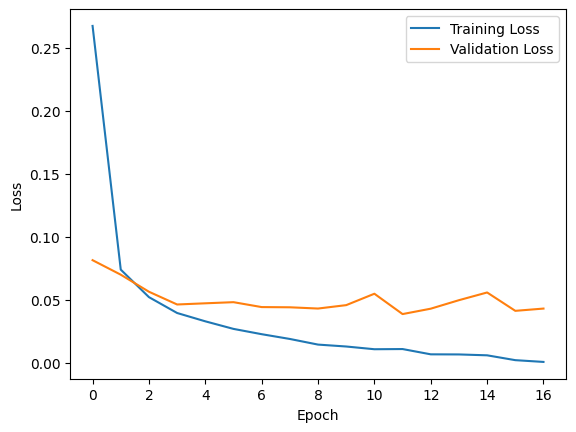

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[reduce_lr, early_stop])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

# Load the IMDb dataset
vocab_size = 10000  # Size of the vocabulary
max_length = 200    # Maximum length of a review (pad or truncate to this length)
embedding_dim = 50  # Dimension of the word embeddings

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Preprocess the text data (padding)
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

# Build the RNN model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    SimpleRNN(units=32),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[reduce_lr])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Perform hyperparameter tuning using grid search
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [64, 128, 256]
optimizers = ['adam', 'rmsprop']

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        for optimizer in optimizers:
            # Build and compile model
            model = Sequential([
                Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
                SimpleRNN(units=32),
                Dense(units=1, activation='sigmoid')
            ])
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            # Train model
            history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2, callbacks=[reduce_lr], verbose=0)

            # Evaluate model
            _, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

            # Check if this combination is the best
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_params = {'learning_rate': lr, 'batch_size': batch_size, 'optimizer': optimizer}

print("Best Hyperparameters:", best_params)
print("Best Test Accuracy:", best_accuracy)

# Visualize training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/10
157/157 [==============================] - 19s 114ms/step - loss: 0.5833 - accuracy: 0.6770 - val_loss: 0.4844 - val_accuracy: 0.7758 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - 15s 93ms/step - loss: 0.3393 - accuracy: 0.8633 - val_loss: 0.3776 - val_accuracy: 0.8434 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - 14s 92ms/step - loss: 0.2279 - accuracy: 0.9145 - val_loss: 0.3824 - val_accuracy: 0.8428 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - 14s 92ms/step - loss: 0.1253 - accuracy: 0.9614 - val_loss: 0.4060 - val_accuracy: 0.8428 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - 15s 93ms/step - loss: 0.0622 - accuracy: 0.9843 - val_loss: 0.4512 - val_accuracy: 0.8458 - lr: 0.0010
Epoch 6/10
157/157 [==============================] - 14s 89ms/step - loss: 0.0323 - accuracy: 0.9938 - val_loss: 0.5172 - val_accuracy: 0.8404 - lr: